In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pynamicalsys import ContinuousDynamicalSystem as cds, PlotStyler

In [2]:
cds.available_models()

['lorenz system']

In [3]:
cds.available_integrators()

['rk4', 'rk45']

In [4]:
ds = cds(model="lorenz system")

In [5]:
ds.info

{'description': '3D Lorenz system',
 'has_jacobian': True,
 'has_variational_equations': True,
 'equations_of_motion': CPUDispatcher(<function lorenz_system at 0x134afab60>),
 'jacobian': CPUDispatcher(<function lorenz_jacobian at 0x134afac00>),
 'dimension': 3,
 'number_of_parameters': 3,
 'parameters': ['sigma', 'rho', 'beta']}

In [6]:
total_time = 50
u = [1, 1, 1]
parameters = [10, 28, 8/3]
time_steps = [0.05, 0.01, 0.005]

In [7]:
ds.integrator("rk4", time_step=time_steps[0])
trajectory = ds.trajectory(u, total_time, parameters=parameters)
trajectory.shape # time, x, y, z

(1001, 4)

In [8]:
ds.integrator_info

{'description': '4th order Runge-Kutta method with fixed step size',
 'integrator': CPUDispatcher(<function rk4_step_wrapped at 0x134afbd80>),
 'estimate_initial_step': False}

In [9]:
ds.integrator("rk4", time_step=time_steps[1])
trajectory_2 = ds.trajectory(u, total_time, parameters=parameters)
trajectory_2.shape # time, x, y, z

(5001, 4)

In [10]:
ds.integrator("rk4", time_step=time_steps[2])
trajectory_3 = ds.trajectory(u, total_time, parameters=parameters)
trajectory_3.shape # time, x, y, z

(10000, 4)

In [11]:
ds.integrator("rk45")
trajectory_rk45 = ds.trajectory(u, total_time, parameters=parameters)
trajectory_rk45.shape # time, x, y, z

(643, 4)

In [12]:
ds.integrator_info

{'description': 'Adaptive 4th/5th order Runge-Kutta-Fehlberg method (RK45) with embedded error estimation',
 'integrator': CPUDispatcher(<function rk45_step_wrapped at 0x134d2c180>),
 'estimate_initial_step': True}

In [13]:
ds.integrator("rk45", atol=1e-8, rtol=1e-4)
trajectory_rk45_2 = ds.trajectory(u, total_time, parameters=parameters)
trajectory_rk45_2.shape # time, x, y, z

(962, 4)

In [14]:
ds.integrator("rk45", atol=1e-8, rtol=1e-6)
trajectory_rk45_3 = ds.trajectory(u, total_time, parameters=parameters)
trajectory_rk45_3.shape # time, x, y, z

(2341, 4)

Text(0.5, 1.0, '$h = 0.005$')

<Figure size 640x480 with 0 Axes>

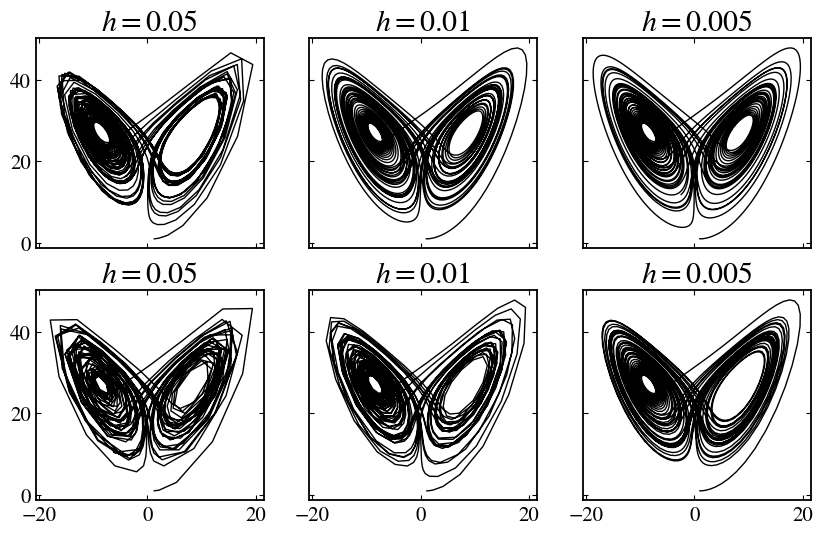

In [15]:
ps = PlotStyler(fontsize=18)
ps.apply_style()
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6))
ax[0, 0].plot(trajectory[:, 1], trajectory[:, 3], "k")
ax[0, 0].set_title(f"$h = {time_steps[0]}$")
ax[0, 1].plot(trajectory_2[:, 1], trajectory_2[:, 3], "k")
ax[0, 1].set_title(f"$h = {time_steps[1]}$")
ax[0, 2].plot(trajectory_3[:, 1], trajectory_3[:, 3], "k")
ax[0, 2].set_title(f"$h = {time_steps[2]}$")

ax[1, 0].plot(trajectory_rk45[:, 1], trajectory_rk45[:, 3], "k")
ax[1, 0].set_title(f"$h = {time_steps[0]}$")
ax[1, 1].plot(trajectory_rk45_2[:, 1], trajectory_rk45_2[:, 3], "k")
ax[1, 1].set_title(f"$h = {time_steps[1]}$")
ax[1, 2].plot(trajectory_rk45_3[:, 1], trajectory_rk45_3[:, 3], "k")
ax[1, 2].set_title(f"$h = {time_steps[2]}$")

In [16]:
total_time = 100.
u = [[1, 1, 1],
     [1.001, 1, 1],
     [1, 1.001, 1],
     [1, 1, 1.001]]
parameters = [10, 28, 8/3]

In [17]:
ds.integrator("rk4", time_step=0.01)
trajectories = ds.trajectory(u, total_time, parameters=parameters)

In [18]:
ds.integrator("rk45", atol=1e-8, rtol=1e-6)
trajectories_rk45 = ds.trajectory(u, total_time, parameters=parameters)

<Figure size 640x480 with 0 Axes>

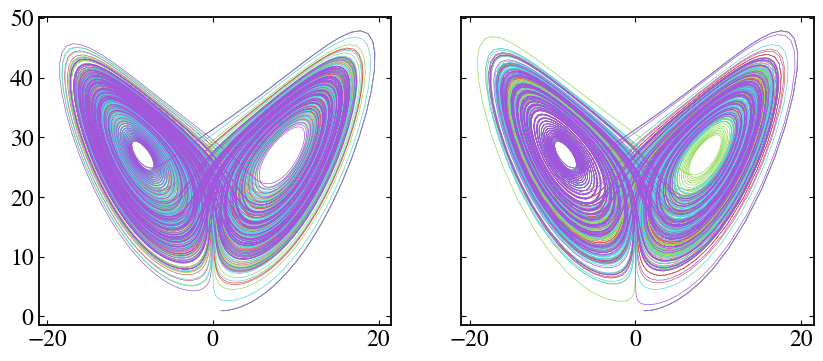

In [19]:
ps = PlotStyler(linewidth=0.5)
ps.apply_style()
colors = sns.color_palette("hls", len(u))
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))
for i in range(len(u)):
    ax[0].plot(trajectories[i][:, 1], trajectories[i][:, 3], color=colors[i])
    ax[1].plot(trajectories_rk45[i][:, 1], trajectories_rk45[i][:, 3], color=colors[i])